
<br>
<p style="font-size: 45px;
          text-align:center;
          font-family: 'Times New Roman';
          font-variant: small-caps;
          font-weight: bold;
          line-height: 50px;"> Detección de Suciedad en Paneles Solares</p>
<br>

# Primera Entrega

## Objetivo:

* Determinar si un panel solar se encuentra con o sin suciedad.

## Justificación:

<br>
<div style="text-align: justify;width:80%;margin: 0 auto"> 
Actualmente la energía solar esta incursionando en el sector energetico dada su condición de ser energía renobable amigable con el medio ambiente, de acuerdo a la UPME  y al ministerio de minas y energía, en Colombia se estima que para antes del 2030 cerca del 10% del consumo energetico va a provenir de proyectos fotovoltaicos o solares [1]. Considerando el panorama que tiene este tipo de fuente de energía es de importancia establecer protocolos de mantenimiento para los dispositivos en cuestión, una de las condiciones que más afecta la generación de energía fotovoltaica es la suciedad en los paneles[2], pues esta puede hacer que la potencia producida disminuya significativamente, teniendo consecuencias económicas en los proyectos dado que esta pérdida es energía que se deja de ofrecer en el mercado energetico.
</div>



<br>

<img src="https://deep-solar-eye.github.io/img/powerDiag.png" width=500>
<p style="text-align: center">Figura 1. Pérdidas de potencia eléctrica (W) en presencia de suciedad</p>

## Descripción de la base de datos

<br>
<div style="text-align: justify;width:80%;margin: 0 auto"> 
La base de datos con la que se cuenta en este proyecto es tomada de un trabajo previo llamado "Deep Solar Eye", el cual suministra  más de 45 000 imagenes de paneles solares bajo condiciones controladas. Las imágenes en cuestión fueron adquiridas con una cámara RGB, el experimento realizado para la adquisición de las imagenes consta una instalación de dos paneles solares identicos uno al lado del otro, con la cámara en cuestión enfocandolos, a uno de los paneles se le fue agregando diferentes tipos de suciedad, mientras que, el segundo se utilizó solo como referencia. Las imagenes tomadas fueron adquiridas en intervalos de 5 segundos al tiempo que se tomaba registro del porcentaje de pérdidas en potencia (LW%) con relación al panel de referencia.
</div>

<br>


<img src="res/Dataset.JPG" width=300>
<p style="text-align: center">Figura 2. Registro de Potencia en los paneles solares con presencia de suciedad</p>


<br>
<br>


<div style="text-align: justify;width:80%;margin: 0 auto"> 
    Cada una de las imagenes tomadas cuenta con unos metadatos en su identificación. Por un lado se tiene registro de la fecha y hora de adquisición de la imagen, por otro lado, se tiene el porcentaje de pérdida en potencia respecto al panel de referencia, y adicionalmente se tiene el dato del nivel de irrdiancia del sol en el momento en cuestión.
</div>

<br>

<img src="res/Dataset_Etiquetas.JPG" width=500>
<p style="text-align: center">Figura 3. Etiquetado de las imagenes del dataset</p>

<br>


<div style="text-align: justify;width:80%;margin: 0 auto"> 
En el dataset se cuenta con 8 tipos diferentes de suciedad (Polvo, Nieve, Excremento de ave, entre otros) que cuentan con la siguiente proporción:
</div>


<img src="res/Dataset_Distribucion.JPG" width=500>
<p style="text-align: center">Figura 4. Proporción de las clases de suciedad en el dataset</p>


<br>
<div style="text-align: justify;width:80%;margin: 0 auto"> 
Las imagenes con las que se cuenta tienen dimensiones de (192,192,3) 
</div>

---


# Presentación de GUI creada (Explorar Dataset)

### Instalación de requerimietos adicionales

In [1]:
# !pip3 install -U -q ipywidgets
# !jupyter labextension install @jupyter-widgets/jupyterlab-manager #(Installing into JupyterLab 1 or 2)

### Importar de librerías

In [1]:
from ipywidgets import interact, interactive
import ipywidgets as widgets
from ipywidgets import Layout

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append('./utils/')

from utils.GUI_Color import *

from pathlib import Path

cwd = Path.cwd()
DATA_PATH = cwd / 'Suciedad_tipo2'

images = list(DATA_PATH.glob('*.jpg'))
images =[image.relative_to(cwd) for image in images]

# images 

## Análisis de los espacios de color y operaciones sobre el histograma

In [2]:
display(create_GUI(images))

---

# Análisis de Espacios de Color


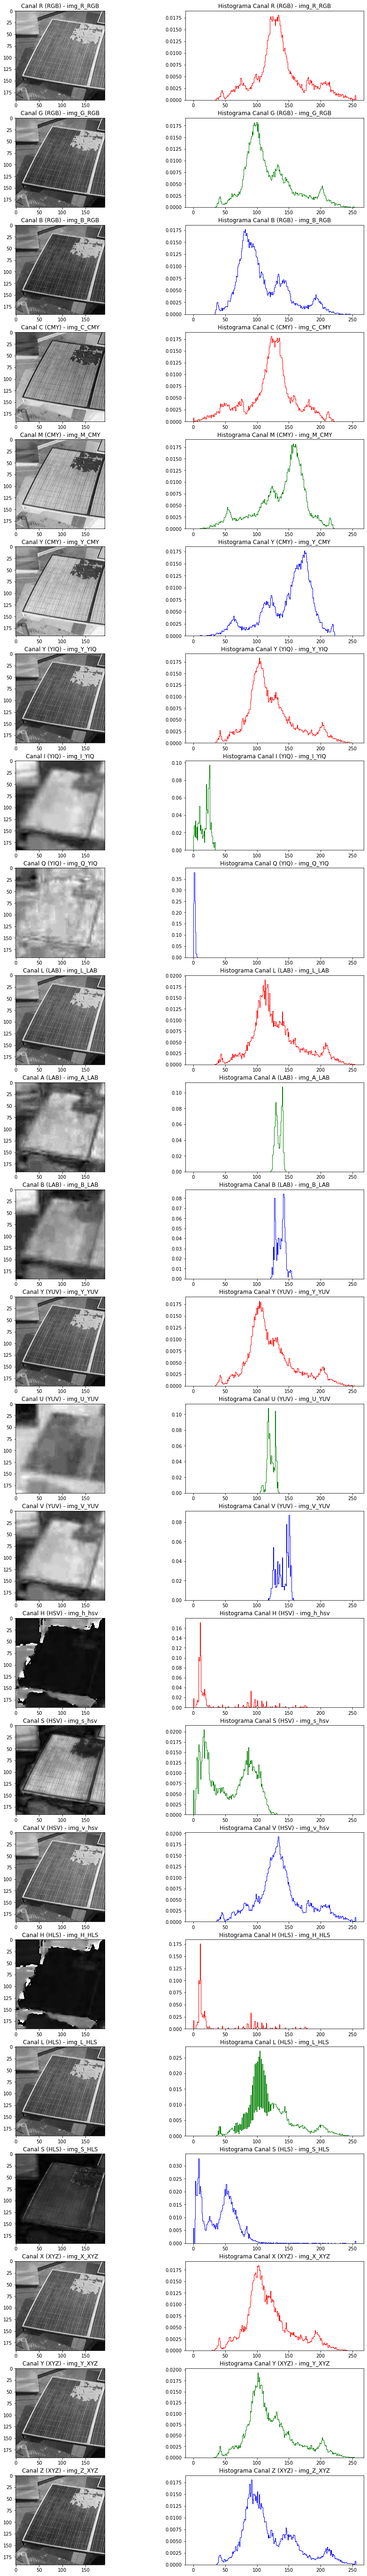

In [5]:
def createPlot(pos=0,img_channel=None,img_color='k',label='Error'):
    arreglo_plots[pos,0].set_title(label)
    arreglo_plots[pos,0].imshow(img_channel, cmap="gray")
    arreglo_plots[pos,1].set_title('Histograma '+ label)
    img_array_i = img_channel.ravel()
    arreglo_plots[pos,1].hist(img_array_i,histtype='step', bins=255, 
                                range=(0.0, 255.0),density=True, color=img_color);
    
def ColorSpace(img_rgb):



    # ##########################################################################################
    # #Espacio de color RGB

    # ##
    img_R_RGB = img_rgb[:,:,0]
    img_G_RGB = img_rgb[:,:,1]
    img_B_RGB = img_rgb[:,:,2]
    ##
    createPlot(0,img_R_RGB,'r','Canal R (RGB) - img_R_RGB')
    createPlot(1,img_G_RGB,'g','Canal G (RGB) - img_G_RGB')
    createPlot(2,img_B_RGB,'b','Canal B (RGB) - img_B_RGB')


    ##########################################################################################
    # #Espacio de color CMY
    ##
    img_C_CMY = 255 - img_rgb[:,:,0]
    img_M_CMY = 255 - img_rgb[:,:,1]
    img_Y_CMY = 255 - img_rgb[:,:,2]
    ##

    createPlot(3,img_C_CMY,'r','Canal C (CMY) - img_C_CMY')
    createPlot(4,img_M_CMY,'g','Canal M (CMY) - img_M_CMY')
    createPlot(5,img_Y_CMY,'b','Canal Y (CMY) - img_Y_CMY')
    ##########################################################################################
    #Espacio de color YIQ
    img_Y_YIQ = 0.299*img_R_RGB + 0.587*img_G_RGB + 0.114*img_B_RGB
    img_I_YIQ = 0.596*img_R_RGB - 0.274*img_G_RGB - 0.322*img_B_RGB
    img_Q_YIQ = 0.211*img_R_RGB - 0.523*img_G_RGB + 0.312*img_B_RGB

    createPlot(6,img_Y_YIQ,'r','Canal Y (YIQ) - img_Y_YIQ')
    createPlot(7,img_I_YIQ,'g','Canal I (YIQ) - img_I_YIQ')
    createPlot(8,img_Q_YIQ,'b','Canal Q (YIQ) - img_Q_YIQ')
    ##########################################################################################
    #Espacio de color LAB
    ##
    img_lab  = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2LAB)
    img_L_LAB = img_lab[:,:,0]
    img_A_LAB = img_lab[:,:,1]
    img_B_LAB = img_lab[:,:,2]
    ##
    createPlot(9 ,img_L_LAB,'r','Canal L (LAB) - img_L_LAB')
    createPlot(10,img_A_LAB,'g','Canal A (LAB) - img_A_LAB')
    createPlot(11,img_B_LAB,'b','Canal B (LAB) - img_B_LAB')

    ##########################################################################################
    # #Espacio de color YUV
    img_yuv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2YUV)

    img_Y_YUV = img_yuv[:,:,0]
    img_U_YUV =  img_yuv[:,:,1]
    img_V_YUV = img_yuv[:,:,2]

    createPlot(12,img_Y_YUV,'r','Canal Y (YUV) - img_Y_YUV')
    createPlot(13,img_U_YUV,'g','Canal U (YUV) - img_U_YUV')
    createPlot(14,img_V_YUV,'b','Canal V (YUV) - img_V_YUV')

    ##########################################################################################
    # #Espacio de color HSV
    ##
    hsv = cv2.cvtColor(img_rgb,cv2.COLOR_RGB2HSV)
    img_h_hsv = hsv[:, :, 0]
    img_s_hsv = hsv[:, :, 1]
    img_v_hsv = hsv[:, :, 2]
    # ##
    createPlot(15,img_h_hsv,'r','Canal H (HSV) - img_h_hsv')
    createPlot(16,img_s_hsv,'g','Canal S (HSV) - img_s_hsv')
    createPlot(17,img_v_hsv,'b','Canal V (HSV) - img_v_hsv')

    ##########################################################################################
    # #Espacio de color HLS
    ##
    HLS= cv2.cvtColor(img_rgb,cv2.COLOR_RGB2HLS)
    img_H_HLS = HLS[:, :, 0]
    img_L_HLS = HLS[:, :, 1]
    img_S_HLS = HLS[:, :, 2]
    ##
    createPlot(18,img_H_HLS,'r','Canal H (HLS) - img_H_HLS')
    createPlot(19,img_L_HLS,'g','Canal L (HLS) - img_L_HLS')
    createPlot(20,img_S_HLS,'b','Canal S (HLS) - img_S_HLS')

    ##########################################################################################
    # #Espacio de color xyz
    img_xyz  = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2XYZ)
    img_X_XYZ = img_xyz[:,:,0]
    img_Y_XYZ = img_xyz[:,:,1]
    img_Z_XYZ = img_xyz[:,:,2]

    createPlot(21,img_X_XYZ,'r','Canal X (XYZ) - img_X_XYZ')
    createPlot(22,img_Y_XYZ,'g','Canal Y (XYZ) - img_Y_XYZ')
    createPlot(23,img_Z_XYZ,'b','Canal Z (XYZ) - img_Z_XYZ')
    
    
fig, arreglo_plots = plt.subplots(24,2, figsize=(15, 100))
img_rgb=cv2.imread(str(images[10]))
ColorSpace(img_rgb)

# Transformaciones 


## Creación de la mascara del Panel

In [5]:
def createPlot0(img_channel=None,img_color='k',label='Imagen'):
    arreglo_plots[0].set_title(label)
    arreglo_plots[0].imshow(img_channel, cmap="gray")
    arreglo_plots[1].set_title('Histograma '+ label)
    img_array_i = img_channel.ravel()
    arreglo_plots[1].hist(img_array_i,histtype='step', bins=255, 
                                range=(0.0, 255.0),density=True, color=img_color);


    
def createPlot2(pos=0,original_img=None,img_channel=None,img_color='k',label='Error',colormap='gray'):
    
    arreglo_plots[pos,0].set_title('imagen Original')
    arreglo_plots[pos,0].imshow(original_img)
    
    arreglo_plots[pos,1].set_title(label)
    arreglo_plots[pos,1].imshow(img_channel,cmap=colormap)

    arreglo_plots[pos,2].set_title('Histograma '+ label)
    img_array_i = img_channel.ravel()
    arreglo_plots[pos,2].hist(img_array_i,histtype='step', bins=255, 
                                range=(0.0, 255.0),density=True, color=img_color);
    

In [4]:

from ipywidgets import interact, interactive
import ipywidgets as widgets

import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
from skimage import io, color
from ipywidgets import Layout
import os
%matplotlib inline

import sys
sys.path.append('./utils/')
from utils.funciones_utiles import *
import glob
result_imgs = glob.glob(os.path.join("results/",'*.jpg'))

def aplicar_mascara(img):
    
    img = cv2.imread(os.path.join("results/",img))
    
    mask = get_mask() / 255
    mask =  cv2.resize(mask, (img.shape[1], img.shape[0])).astype(np.uint8)

    result = cv2.multiply(img, mask)
    
    fig, arreglo_plots = plt.subplots(1,2, figsize=(15,8))
    
    arreglo_plots[0].set_title('máscara')
    arreglo_plots[0].imshow(mask * 255)
    
    arreglo_plots[1].set_title('imágen con máscara aplicada')
    arreglo_plots[1].imshow(result)
    
    plt.show()

_ = interact(
        aplicar_mascara,
        img=widgets.Dropdown(
            options=[img.split("\\")[1] for img in result_imgs], description="Escoger imagen:",
            style= {'description_width': 'auto'}
        ),        
    )

interactive(children=(Dropdown(description='Escoger imagen:', options=('HLS.jpg',), style=DescriptionStyle(des…

In [11]:
result_imgs[0].split("\\")

['results', 'A.jpg']

# Referencias 

[1] https://eficienciaenergetica.celsia.com/todo-lo-que-debes-saber-sobre-energia-solar-en-colombia/ <br><br>
[2] https://deep-solar-eye.github.io/